## import library

In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
from tensorflow.keras.losses import CategoricalCrossentropy

import matplotlib.pyplot as plt

## load dataset

In [2]:

directory = r'data'

# Image data loading
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=24,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=True,
    crop_to_aspect_ratio=False,
)

Found 1083 files belonging to 15 classes.


## visualize the image

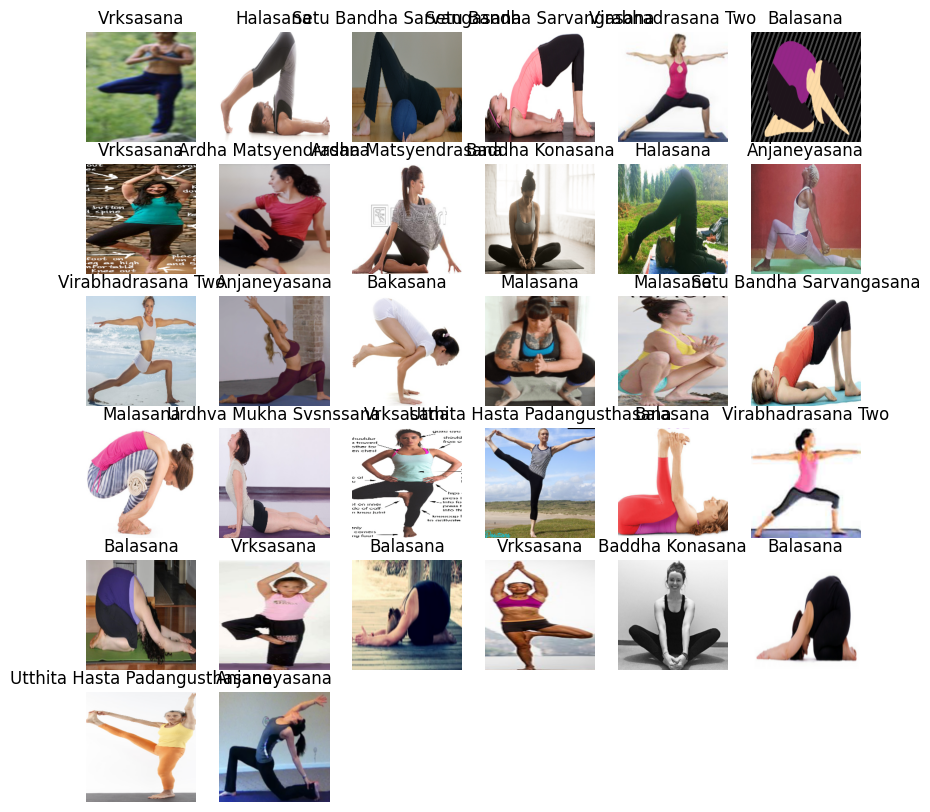

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
class_names = train_ds.class_names

for images, labels in train_ds.take(2):
    for i in range(32):
        ax = plt.subplot(6, 6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        # Extract the class label from the one-hot encoded array
        class_label_index = int(np.argmax(labels[i]))
        plt.title(class_names[class_label_index])
        
        plt.axis("off")

plt.show()


## RGB to Grey scale

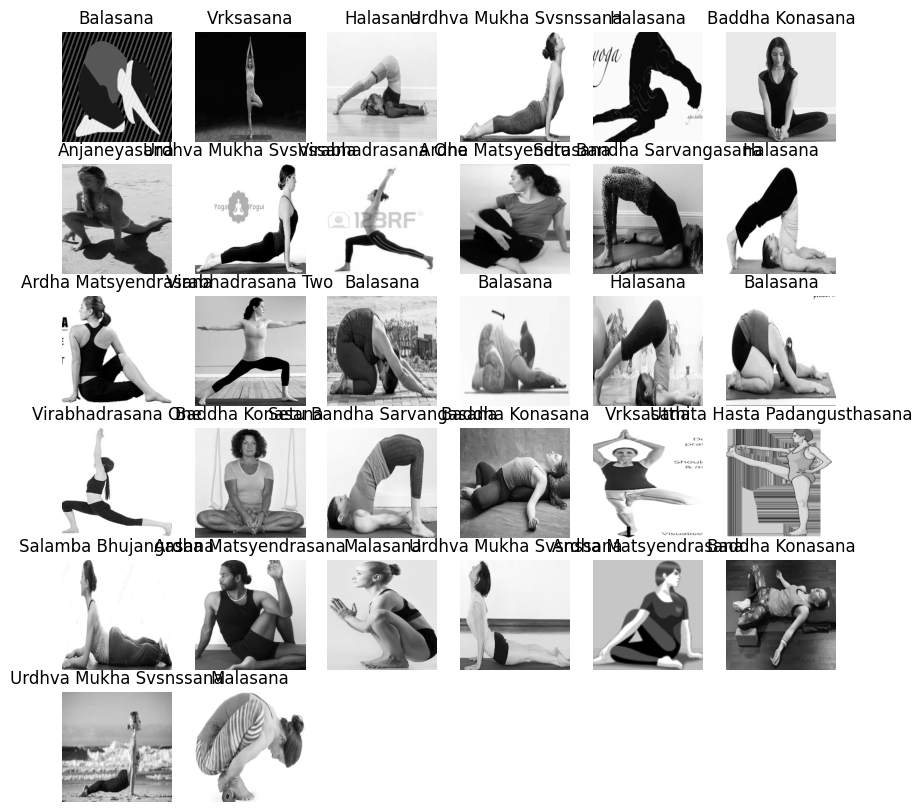

In [4]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 10))
class_names = train_ds.class_names

for images, labels in train_ds.take(2):
    for i in range(32):
        ax = plt.subplot(6, 6, i + 1)
        
        # Convert RGB image to grayscale
        grayscale_image = np.dot(images[i].numpy(), [0.2989, 0.5870, 0.1140])
        plt.imshow(grayscale_image, cmap='gray')
        
        # Extract the class label from the one-hot encoded array
        class_label_index = int(np.argmax(labels[i]))
        plt.title(class_names[class_label_index])
        
        plt.axis("off")

plt.show()


# Data Augumentation


In [5]:
directory = r'data'

# Data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=30,
    validation_split=0.2,
    fill_mode='nearest'
)


# Train data iterator
train_it = datagen.flow_from_directory(
    directory,
    class_mode='categorical',
    target_size=(224, 224),
    batch_size=100,
    subset='training',
    seed=24
)

# Validation data iterator
val_it = datagen.flow_from_directory(
    directory,
    class_mode='categorical',
    target_size=(224, 224),
    batch_size=100,
    subset='validation',
    seed=24
)



Found 872 images belonging to 15 classes.
Found 209 images belonging to 15 classes.


## model artitecture

In [6]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
from tensorflow.keras.losses import CategoricalCrossentropy

# Freeze the convolutional layers
for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(15, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss=CategoricalCrossentropy(),
    metrics=['accuracy']
)

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 15)                376335    
                                                                 
Total params: 15091023 (57.57 MB)
Trainable params: 376335 (1.44 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


## train the model

In [7]:
# Train the model
history = model.fit(
    train_it,
    validation_data=val_it,
    epochs=15
)

Epoch 1/15
4/9 [============>.................] - ETA: 1:29 - loss: 3.3222 - accuracy: 0.1290

d:\codeleaf\Deep_Learning\fruit\lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


9/9 [==============================] - 197s 22s/step - loss: 2.9350 - accuracy: 0.2018 - val_loss: 2.2197 - val_accuracy: 0.3828
Epoch 2/15
9/9 [==============================] - 176s 20s/step - loss: 1.7300 - accuracy: 0.4817 - val_loss: 1.4255 - val_accuracy: 0.5742
Epoch 3/15
9/9 [==============================] - 182s 20s/step - loss: 1.1968 - accuracy: 0.6365 - val_loss: 1.3498 - val_accuracy: 0.6172
Epoch 4/15
9/9 [==============================] - 182s 20s/step - loss: 0.8805 - accuracy: 0.7408 - val_loss: 1.0683 - val_accuracy: 0.7129
Epoch 5/15
9/9 [==============================] - 194s 22s/step - loss: 0.7104 - accuracy: 0.7913 - val_loss: 0.9745 - val_accuracy: 0.7225
Epoch 6/15
9/9 [==============================] - 190s 21s/step - loss: 0.6404 - accuracy: 0.8119 - val_loss: 1.0304 - val_accuracy: 0.6699
Epoch 7/15
9/9 [==============================] - 190s 21s/step - loss: 0.5595 - accuracy: 0.8383 - val_loss: 0.9268 - val_accuracy: 0.7416
Epoch 8/15
9/9 [===============

## visualize the losses and accuracy

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


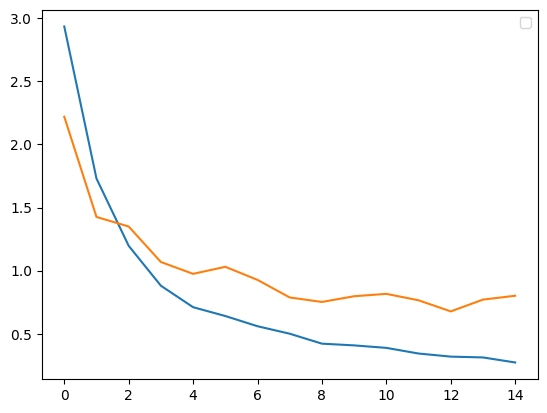

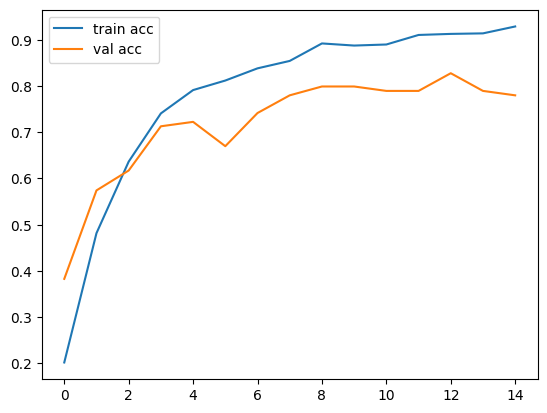

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend()
plt.show()

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [9]:
model.evaluate(val_it)


3/3 [==============================] - 28s 8s/step - loss: 0.8782 - accuracy: 0.7321


[0.8782163858413696, 0.7320573925971985]

## check the accuracy of the model

In [10]:

# Print the final training and validation accuracy
final_train_accuracy = history.history['accuracy'][-1]
final_val_accuracy = history.history['val_accuracy'][-1]

print("Final Accuracy:", final_train_accuracy)
print("Final Validation Accuracy:", final_val_accuracy)

Final Accuracy: 0.9288991093635559
Final Validation Accuracy: 0.779904305934906


# Saving Model

In [11]:
model.save('vgg_yoga.h5')

d:\codeleaf\Deep_Learning\fruit\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [12]:
from tensorflow import keras
model = keras.models.load_model('vgg_yoga.h5')

In [13]:
train_it.class_indices


{'Adho Mukha Svanasana': 0,
 'Anjaneyasana': 1,
 'Ardha Matsyendrasana': 2,
 'Baddha Konasana': 3,
 'Bakasana': 4,
 'Balasana': 5,
 'Halasana': 6,
 'Malasana': 7,
 'Salamba Bhujangasana': 8,
 'Setu Bandha Sarvangasana': 9,
 'Urdhva Mukha Svsnssana': 10,
 'Utthita Hasta Padangusthasana': 11,
 'Virabhadrasana One': 12,
 'Virabhadrasana Two': 13,
 'Vrksasana': 14}

# predicted by user input

In [14]:
from tensorflow.keras.models import load_model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import load_img
import numpy as np

# Assuming 'model' is already defined
model = load_model('vgg_yoga.h5')

# New dictionary mapping class indices to class labels
class_dict = {
 0:'Adho Mukha Svanasana',
 1:'Anjaneyasana',
 2:'Ardha Matsyendrasana',
 3:'Baddha Konasana',
 4:'Bakasana',
 5:'Balasana',
 6:'Halasana',
 7:'Malasana',
 8:'Salamba Bhujangasana',
 9:'Setu Bandha Sarvangasana',
 10:'Urdhva Mukha Svsnssana',
 11:'Utthita Hasta Padangusthasana',
 12:'Virabhadrasana One',
 13:'Virabhadrasana Two',
 14:'Vrksasana'
}
image_path = r'data\Bakasana\File11.png'
# Path to the image
image = load_img(image_path, target_size=(224, 224))
img = np.array(image)
img = preprocess_input(img)
img = img.reshape(1, 224, 224, 3)

prediction = model.predict(img)

# Get the predicted class index
predicted_class_index = np.argmax(prediction)

# Get the corresponding class label
predicted_class_label = class_dict[predicted_class_index]

# Print the predicted class label
print(f"The predicted class is: {predicted_class_label}")

1/1 [==============================] - 0s 314ms/step
The predicted class is: Bakasana


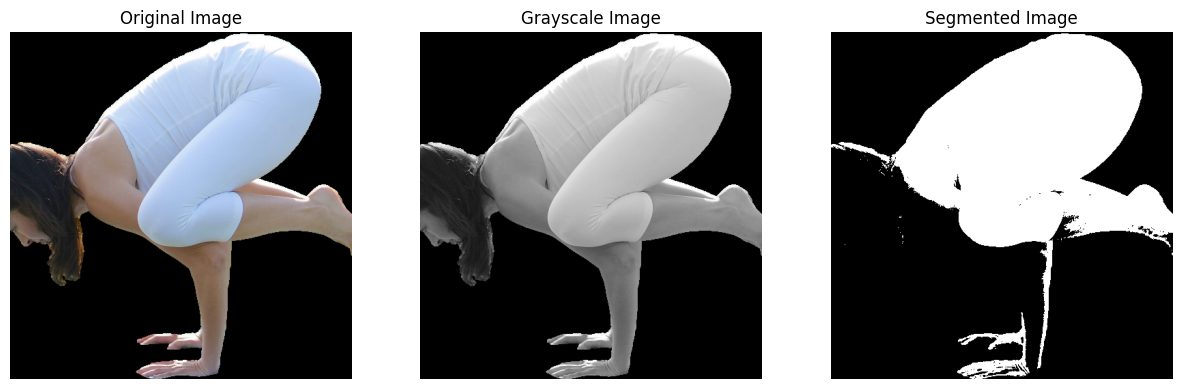

In [15]:
import cv2
import matplotlib.pyplot as plt

# Read the image
image_path = r'data\Bakasana\File11.png'


image = cv2.imread(image_path)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to segment the image
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# Display the original, grayscale, and segmented images
plt.figure(figsize=(15, 5))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Grayscale Image
plt.subplot(1, 3, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

# Segmented Image
plt.subplot(1, 3, 3)
plt.imshow(binary_image, cmap='gray')
plt.title('Segmented Image')
plt.axis('off')

plt.show()
